In [1]:
import import_ipynb

importing Jupyter notebook from week2.ipynb
importing Jupyter notebook from week1.ipynb
total numbers of data in last 3 months: 63
0     1098.65
1     1092.75
2     1106.40
3     1121.00
4     1121.25
       ...   
58    1102.10
59    1090.05
60    1109.40
61    1048.85
62    1122.25
Name: Close, Length: 63, dtype: float64


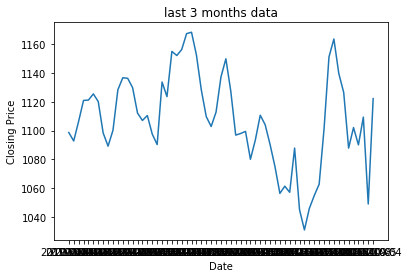



Closing price varies from  1098.65  to  1122.25
total numbers of data in last 2 months: 42
[1122.66419264 1124.84165008 1125.41821168 1129.6398938  1121.66611747
 1120.48673519 1127.88394992 1124.13185572 1127.30738833 1125.12993088
 1120.19845439 1121.08955588 1122.08763104 1106.38142598 1127.01910753
 1128.77505141 1121.37783667]


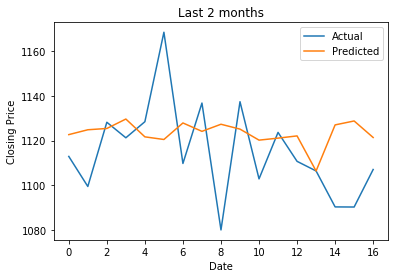

Root Mean Squared Error: 23.667210948441905
Enter date in (DD MM YYYY) format:04 01 2019
Predicted closing price: [1101.44994949]

Ridge Regression

Best parameters: {'alpha': 100}
Best score: -635.5290812848493
Total number of features: 4
Number of selected features: 4
RMSE for Ridge: 22.133567259980616

Lasso Regression

Best parameters: {'alpha': 10}
Best score: -643.2345918873684
Total number of features: 4
Number of selected features: 1
RMSE for Lasso: 22.133567259980616
lasso prediction: [1121.3846326  1121.3846326  1121.3846326  1122.29499605 1122.29499605
 1121.3846326  1121.3846326  1122.29499605 1121.3846326  1121.3846326
 1121.3846326  1122.29499605 1121.3846326  1112.28099816 1121.3846326
 1122.29499605 1122.29499605]


ridge prediction: [1122.20223914 1122.64667434 1123.49001514 1125.86056549 1122.41890787
 1121.75780393 1124.35612075 1123.28501347 1123.51277994 1123.06834474
 1121.33613353 1121.57556706 1121.35889833 1108.89952558 1123.09110954
 1124.59555428 1121.9972374

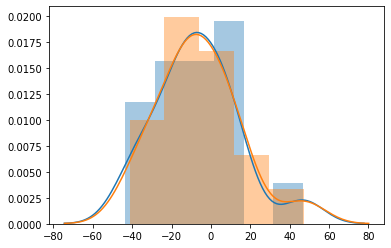

In [2]:
import week2

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import ElasticNet 

In [4]:
from week1 import x_train,y_train,x_test,y_test
#specify ElasticNet Regression
enet=ElasticNet()
parameters={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,100,1000,10000]}
enet_reg=GridSearchCV(enet,parameters,scoring='neg_mean_squared_error',cv=5)
enet_reg.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [5]:
import numpy as np
print("Best parameters:",enet_reg.best_params_)
print("Best score:",enet_reg.best_score_)
best_lr=enet_reg.best_estimator_
coefs=best_lr.coef_
print("Total number of features:",coefs.size)
print("Number of selected features:",np.count_nonzero(coefs))

Best parameters: {'alpha': 10}
Best score: -640.123174396735
Total number of features: 3
Number of selected features: 3


In [6]:
enet_pred=enet_reg.predict(x_test)
enet_pred

array([1121.64504325, 1121.47667996, 1121.98603997, 1123.15486335,
       1122.38655317, 1121.81340653, 1122.07235669, 1122.47286989,
       1121.56299668, 1121.73135997, 1121.55872653, 1121.87719316,
       1121.13568323, 1111.94784531, 1121.30831667, 1122.39082333,
       1122.13187317])

In [7]:
import pandas as pd
from sklearn import metrics
from week1 import rmse,new_df
from week2 import y_test,ls_rmse,rd_rmse

In [8]:
enet_rmse=np.sqrt(metrics.mean_squared_error(y_test, enet_pred))
print("RMSE for lasso:",ls_rmse)
print("RMSE for ridge:",rd_rmse)
print("RMSE for Elastic NEt:",enet_rmse)

RMSE for lasso: 21.547488054997253
RMSE for ridge: 22.133567259980616
RMSE for Elastic NEt: 21.50956586985377


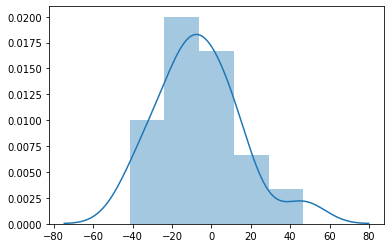

In [9]:
import seaborn as sns
sns.distplot(y_test-enet_pred)

In [10]:
stocks=['Reliance','Reliance','Reliance','Reliance']
reg_model=['LR','RR','LS','ER']
rmse_val=[rmse,rd_rmse,ls_rmse,enet_rmse]
mat=[stocks,reg_model,rmse_val]
print(mat)
data=pd.DataFrame({'stocks':mat[0],'reg_model':mat[1],'rmse_val':mat[2]})
data

[['Reliance', 'Reliance', 'Reliance', 'Reliance'], ['LR', 'RR', 'LS', 'ER'], [23.667210948441905, 22.133567259980616, 21.547488054997253, 21.50956586985377]]


,stocks,reg_model,rmse_val
0,Reliance,LR,23.667211
1,Reliance,RR,22.133567
2,Reliance,LS,21.547488
3,Reliance,ER,21.509566


Text(0.5, 1.0, 'Performace Under Varying K Values')

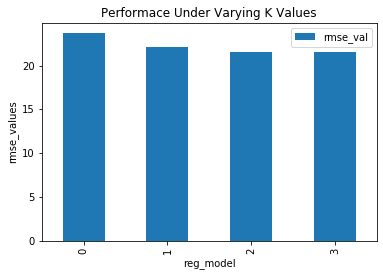

In [11]:
# boxplot algorithm comparison
import matplotlib.pyplot as plt
data.plot.bar()
plt.xlabel('reg_model')
plt.ylabel('rmse_values')
plt.title('Performace Under Varying K Values')  

In [12]:
from sklearn.linear_model import LinearRegression
x=new_df[['month','day','weekday']].values
y=new_df['Close'].values
reg=LinearRegression()
reg.fit(x,y)
new_df['Price_pred']=reg.predict(x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
cur_price=[]
for i in range(len(new_df)):
    if new_df['Price_pred'][i]>new_df['Close'][i]:
        cur_price.append('Higher')
    else:
        cur_price.append('Lower')
new_df['Cur_price']=cur_price
new_df.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,day,month,year,weekday,weekday_name,Close,Price_pred,Cur_price
0,4,1,2019,4,Friday,1098.65,1106.402878,Higher
1,3,1,2019,3,Thursday,1092.75,1104.847664,Higher
2,2,1,2019,2,Wednesday,1106.40,1103.292450,Lower
3,1,1,2019,1,Tuesday,1121.00,1101.737236,Lower
4,31,12,2018,0,Monday,1121.25,1125.195454,Higher
5,28,12,2018,4,Friday,1125.55,1128.056919,Higher
6,27,12,2018,3,Thursday,1120.20,1126.501705,Higher
7,26,12,2018,2,Wednesday,1098.35,1124.946491,Higher
8,24,12,2018,0,Monday,1089.15,1121.836063,Higher
9,21,12,2018,4,Friday,1100.20,1124.697528,Higher


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [15]:
x=new_df[['month','day','weekday']].values
y=new_df['Cur_price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
knn=neighbors.KNeighborsClassifier(n_neighbors=13,weights='uniform',algorithm='auto')
#Fit the model
knn=knn.fit(x_train,y_train)

In [16]:
y_pred=knn.predict(x_test)
print(y_pred)

['Higher' 'Lower' 'Higher' 'Higher' 'Higher' 'Higher' 'Higher' 'Higher'
 'Higher']


In [17]:
k_values=range(1,16)
weight=['uniform','distance']
param=dict(n_neighbors=k_values,weights=weight)
n=neighbors.KNeighborsClassifier()
k=GridSearchCV(n,param,cv=5)
k.fit(x,y)
print(k.best_score_)
print(k.best_params_)

0.5833333333333333
{'n_neighbors': 8, 'weights': 'uniform'}


In [18]:
accuracy=[]
recall=[]
precision=[]
for k in k_values: 
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    y_pred=knn.predict(x)
    accuracy.append(metrics.accuracy_score(y, y_pred))
    recall.append(recall_score(y, y_pred,average='macro'))
    precision.append(precision_score(y, y_pred,average='macro'))

In [19]:
data = pd.DataFrame({'k':k_values,'Precision': precision, 'Recall': recall,'Accuracy':accuracy})
data

,k,Precision,Recall,Accuracy
0,1,1.000000,1.000000,1.000000
1,2,0.928571,0.888889,0.904762
2,3,0.951389,0.951389,0.952381
3,4,0.858090,0.812500,0.833333
4,5,0.782353,0.777778,0.785714
5,6,0.809375,0.729167,0.761905
6,7,0.738095,0.743056,0.738095
7,8,0.690981,0.666667,0.690476
8,9,0.737037,0.722222,0.738095
9,10,0.698529,0.625000,0.666667


In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
scores={}
precision={}

In [21]:
x=new_df[['month','day','weekday']].values
y=new_df['Cur_price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model= DecisionTreeClassifier(max_depth=3, min_samples_leaf=3,random_state=1)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [22]:
# predict the target on the test dataset
y_pred = model.predict(x_test)
print('Target on test data',y_pred) 

# Accuracy Score on test dataset
dtc_accuracy= accuracy_score(y_test,y_pred)
print('Data accuracy: %.2f' %dtc_accuracy)

scores['DecisionTree'] = dtc_accuracy
print(scores)

Target on test data ['Higher' 'Higher' 'Higher' 'Higher' 'Lower' 'Higher' 'Higher' 'Lower'
 'Higher']
Data accuracy: 0.78
{'DecisionTree': 0.7777777777777778}


In [23]:
print("Report:")
print(classification_report(y_test,y_pred))
dtc_prec=precision_score(y_test, y_pred,average='macro')
precision['DecisionTree'] = dtc_prec
print(precision)

Report:
              precision    recall  f1-score   support

      Higher       0.71      1.00      0.83         5
       Lower       1.00      0.50      0.67         4

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9

{'DecisionTree': 0.8571428571428572}


In [24]:
from IPython.display import Image  
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
import graphviz
import collections

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


[Text(209.25, 475.65000000000003, 'X[1] <= 3.5\ngini = 0.489\nsamples = 33\nvalue = [19, 14]'),
 Text(139.5, 339.75, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(279.0, 339.75, 'X[1] <= 15.5\ngini = 0.471\nsamples = 29\nvalue = [18, 11]'),
 Text(139.5, 203.85000000000002, 'X[1] <= 8.0\ngini = 0.375\nsamples = 16\nvalue = [12, 4]'),
 Text(69.75, 67.94999999999999, 'gini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(209.25, 67.94999999999999, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(418.5, 203.85000000000002, 'X[1] <= 20.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(348.75, 67.94999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(488.25, 67.94999999999999, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]')]

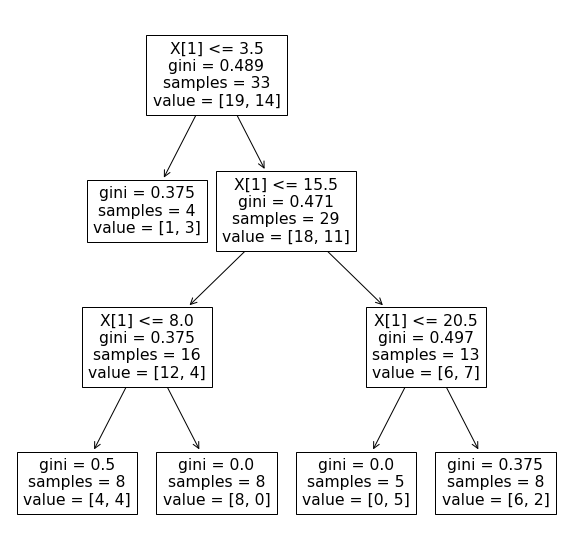

In [25]:
plt.figure(figsize=(10,10))
tree.plot_tree(model.fit(x_train,y_train))

In [26]:
X=x
Y=list(new_df['Cur_price'])
clf=tree.DecisionTreeClassifier()
feature=pd.DataFrame(new_df,columns=['day','month','weekday'])
clf=clf.fit(X,Y)

In [27]:
dot_data = tree.export_graphviz(model,feature_names=feature.columns,out_file=None,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [29]:
classifier = RandomForestClassifier(n_estimators = 8, criterion = 'entropy', random_state = 0)
classifier.fit(x_train,y_train)    
y_pred = classifier.predict(x_test)
rfc_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy score:%.2f" %rfc_accuracy)
scores['RandomForest'] = rfc_accuracy
print(y_pred)
print(scores)

Accuracy score:0.56
['Higher' 'Higher' 'Lower' 'Higher' 'Higher' 'Higher' 'Lower' 'Higher'
 'Higher']
{'DecisionTree': 0.7777777777777778, 'RandomForest': 0.5555555555555556}


In [30]:
print("Report:")
print(classification_report(y_test,y_pred))
rf_prec=precision_score(y_test, y_pred,average='macro')
precision['RandomForest'] = rf_prec
print(precision)

Report:
              precision    recall  f1-score   support

      Higher       0.57      0.80      0.67         5
       Lower       0.50      0.25      0.33         4

    accuracy                           0.56         9
   macro avg       0.54      0.53      0.50         9
weighted avg       0.54      0.56      0.52         9

{'DecisionTree': 0.8571428571428572, 'RandomForest': 0.5357142857142857}


In [31]:
from sklearn.ensemble import VotingClassifier 

In [32]:
# group / ensemble of models 
estimator = [] 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 

In [33]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(x_train, y_train) 
y_pred = vot_hard.predict(x_test) 
print(y_pred)
# using accuracy_score metric to predict accuracy 
vc_hard_accuracy = accuracy_score(y_test, y_pred) 
scores['VotingClassifier_hard'] = vc_hard_accuracy
print("Hard Voting Score % d" %vc_hard_accuracy)
print(scores)

['Higher' 'Higher' 'Higher' 'Higher' 'Higher' 'Lower' 'Higher' 'Lower'
 'Higher']
Hard Voting Score  0
{'DecisionTree': 0.7777777777777778, 'RandomForest': 0.5555555555555556, 'VotingClassifier_hard': 0.7777777777777778}


In [34]:
print("Report:")
print(classification_report(y_test,y_pred))
vc_hard_prec=precision_score(y_test, y_pred,average='macro')
precision['VotingClassifier_hard'] = vc_hard_prec
print(precision)

Report:
              precision    recall  f1-score   support

      Higher       0.71      1.00      0.83         5
       Lower       1.00      0.50      0.67         4

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9

{'DecisionTree': 0.8571428571428572, 'RandomForest': 0.5357142857142857, 'VotingClassifier_hard': 0.8571428571428572}


In [35]:
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 
vot_soft.fit(x_train, y_train) 
y_pred = vot_soft.predict(x_test)
print(y_pred)
# using accuracy_score metric to predict accuracy 
vc_soft_accuracy = accuracy_score(y_test, y_pred) 
scores['VotingClassifier_soft'] = vc_soft_accuracy
print("Soft Voting Score % d" %vc_soft_accuracy)
print(scores)

['Higher' 'Higher' 'Lower' 'Higher' 'Lower' 'Lower' 'Lower' 'Lower'
 'Higher']
Soft Voting Score  0
{'DecisionTree': 0.7777777777777778, 'RandomForest': 0.5555555555555556, 'VotingClassifier_hard': 0.7777777777777778, 'VotingClassifier_soft': 0.8888888888888888}


In [36]:
print("Report:")
print(classification_report(y_test,y_pred))
vc_soft_prec=precision_score(y_test, y_pred,average='macro')
precision['VotingClassifier_soft'] = vc_soft_prec
print(precision)

Report:
              precision    recall  f1-score   support

      Higher       1.00      0.80      0.89         5
       Lower       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9

{'DecisionTree': 0.8571428571428572, 'RandomForest': 0.5357142857142857, 'VotingClassifier_hard': 0.8571428571428572, 'VotingClassifier_soft': 0.9}


In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [39]:
print(y_pred)
# using accuracy_score metric to predict accuracy 
adaboost_accuracy = accuracy_score(y_test, y_pred) 
scores['Adaboost'] = adaboost_accuracy 
print("Adaboost Score % d" %adaboost_accuracy)
print(scores)

['Higher' 'Higher' 'Higher' 'Lower' 'Lower' 'Higher' 'Higher' 'Lower'
 'Higher']
Adaboost Score  0
{'DecisionTree': 0.7777777777777778, 'RandomForest': 0.5555555555555556, 'VotingClassifier_hard': 0.7777777777777778, 'VotingClassifier_soft': 0.8888888888888888, 'Adaboost': 0.6666666666666666}


In [40]:
print("Report:")
print(classification_report(y_test,y_pred))
adb_prec=precision_score(y_test, y_pred,average='macro')
precision['Adaboost'] = adb_prec
print(precision)

Report:
              precision    recall  f1-score   support

      Higher       0.67      0.80      0.73         5
       Lower       0.67      0.50      0.57         4

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65         9
weighted avg       0.67      0.67      0.66         9

{'DecisionTree': 0.8571428571428572, 'RandomForest': 0.5357142857142857, 'VotingClassifier_hard': 0.8571428571428572, 'VotingClassifier_soft': 0.9, 'Adaboost': 0.6666666666666666}


In [41]:
# Import Support Vector Classifier
from sklearn.svm import SVC

In [42]:
svc=SVC(probability=True, kernel='linear')

In [43]:
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [44]:
print(y_pred)
# using accuracy_score metric to predict accuracy 
adaboost_svm_accuracy = accuracy_score(y_test, y_pred) 
scores['Adaboost_svm'] = adaboost_svm_accuracy
print("Adaboost_svm Score % d" %adaboost_svm_accuracy)
print(scores)

['Higher' 'Higher' 'Higher' 'Higher' 'Higher' 'Higher' 'Higher' 'Higher'
 'Higher']
Adaboost_svm Score  0
{'DecisionTree': 0.7777777777777778, 'RandomForest': 0.5555555555555556, 'VotingClassifier_hard': 0.7777777777777778, 'VotingClassifier_soft': 0.8888888888888888, 'Adaboost': 0.6666666666666666, 'Adaboost_svm': 0.5555555555555556}


In [45]:
print("Report:")
print(classification_report(y_test,y_pred))
adb_svm_prec=precision_score(y_test, y_pred,average='macro')
precision['Adaboost_svm'] = adb_svm_prec
print(precision)

Report:
              precision    recall  f1-score   support

      Higher       0.56      1.00      0.71         5
       Lower       0.00      0.00      0.00         4

    accuracy                           0.56         9
   macro avg       0.28      0.50      0.36         9
weighted avg       0.31      0.56      0.40         9

{'DecisionTree': 0.8571428571428572, 'RandomForest': 0.5357142857142857, 'VotingClassifier_hard': 0.8571428571428572, 'VotingClassifier_soft': 0.9, 'Adaboost': 0.6666666666666666, 'Adaboost_svm': 0.2777777777777778}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.3, random_state=12)

In [49]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test) 
print(y_pred)

['Higher' 'Higher' 'Higher' 'Higher' 'Higher' 'Higher' 'Lower' 'Lower'
 'Higher' 'Higher']


In [50]:
# using accuracy_score metric to predict accuracy 
gb_accuracy = accuracy_score(y_test, y_pred) 
scores['GradientBoosting'] =gb_accuracy
print("GradientBoosting Score % d" %gb_accuracy)
print(scores)

GradientBoosting Score  0
{'DecisionTree': 0.7777777777777778, 'RandomForest': 0.5555555555555556, 'VotingClassifier_hard': 0.7777777777777778, 'VotingClassifier_soft': 0.8888888888888888, 'Adaboost': 0.6666666666666666, 'Adaboost_svm': 0.5555555555555556, 'GradientBoosting': 0.8}


In [51]:
print("Report:")
print(classification_report(y_test,y_pred))
gb_prec=precision_score(y_test, y_pred,average='macro')
precision['GradBoost'] = gb_prec
print(precision)

Report:
              precision    recall  f1-score   support

      Higher       0.75      1.00      0.86         6
       Lower       1.00      0.50      0.67         4

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10

{'DecisionTree': 0.8571428571428572, 'RandomForest': 0.5357142857142857, 'VotingClassifier_hard': 0.8571428571428572, 'VotingClassifier_soft': 0.9, 'Adaboost': 0.6666666666666666, 'Adaboost_svm': 0.2777777777777778, 'GradBoost': 0.875}


In [52]:
from sklearn.linear_model import SGDRegressor
x=new_df[['month','day','weekday']].values
y=new_df['Close'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=True)

In [53]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

In [54]:
# SkLearn SGD classifier
clf= SGDRegressor()
clf.fit(x_train, y_train)
y_pred =clf.predict(x_test) 
print(y_pred)

[1099.96934125 1104.40759726 1108.5285619  1118.39085038 1119.64230286
 1136.1800763  1126.28158594 1125.06633533 1127.30356428]


In [55]:
print("Best score: ", clf.intercept_)
print("Coefficients: \n", clf.coef_)

Best score:  [1118.41891283]
Coefficients: 
 [4.01544179 6.90612645 3.94847143]


In [56]:
# using accuracy_score metric to predict accuracy 
sgd_accuracy = metrics.accuracy_score(y_test, y_pred)*100 
scores['SGD'] =sgd_accuracy 
print("SGD Score % d" %sgd_accuracy)
print(scores)

ValueError: continuous is not supported

In [57]:
print("Report:")
print(classification_report(y_test,y_pred))
sgd_prec=precision_score(y_test, y_pred,average='macro')
precision['SGD'] = sgd_prec
print(precision)

Report:


ValueError: continuous is not supported

In [58]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
0,1121.00,1099.969341
1,1106.40,1104.407597
2,1156.45,1108.528562
3,1110.70,1118.390850
4,1097.55,1119.642303
5,1102.85,1136.180076
6,1133.80,1126.281586
7,1097.95,1125.066335
8,1137.40,1127.303564


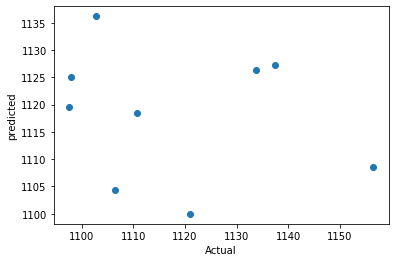

In [59]:
#plotting SGD
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel('predicted')
plt.show()

In [60]:
scores,precision

({'DecisionTree': 0.7777777777777778,
  'RandomForest': 0.5555555555555556,
  'VotingClassifier_hard': 0.7777777777777778,
  'VotingClassifier_soft': 0.8888888888888888,
  'Adaboost': 0.6666666666666666,
  'Adaboost_svm': 0.5555555555555556,
  'GradientBoosting': 0.8},
 {'DecisionTree': 0.8571428571428572,
  'RandomForest': 0.5357142857142857,
  'VotingClassifier_hard': 0.8571428571428572,
  'VotingClassifier_soft': 0.9,
  'Adaboost': 0.6666666666666666,
  'Adaboost_svm': 0.2777777777777778,
  'GradBoost': 0.875})

In [61]:
maxm=max(scores,key=scores.get)
maxm

'VotingClassifier_soft'

In [62]:
maxm=max(precision,key=precision.get)
maxm

'VotingClassifier_soft'

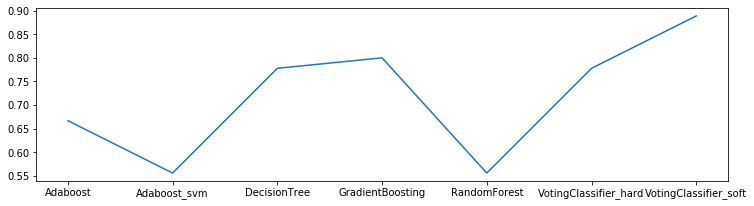

In [63]:
import matplotlib.pylab as plt
#plotting accuracy
lists = sorted(scores.items())
x, y = zip(*lists)
fig=plt.figure(figsize=(120,30))
axes= fig.add_axes([0.01,0.01,0.08,0.08])
axes.plot(x,y)
plt.show()

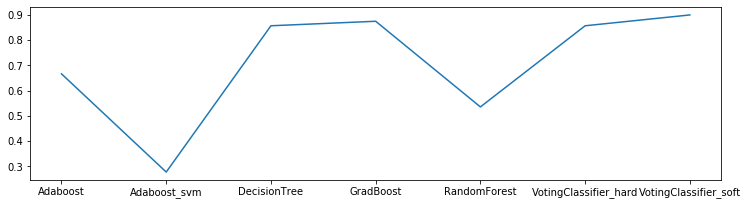

In [64]:
#plotting precision
lists = sorted(precision.items())
x, y = zip(*lists)
fig=plt.figure(figsize=(120,30))
axes= fig.add_axes([0.01,0.01,0.08,0.08])
axes.plot(x,y)
plt.show()

<BarContainer object of 7 artists>

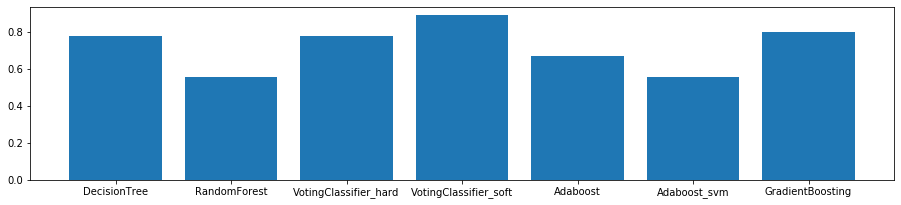

In [65]:
#accuracy
keys = scores.keys()
values = scores.values()
fig=plt.figure(figsize=(150,30))
axes= fig.add_axes([0.01,0.01,0.08,0.08])
axes.bar(keys, values)

<BarContainer object of 7 artists>

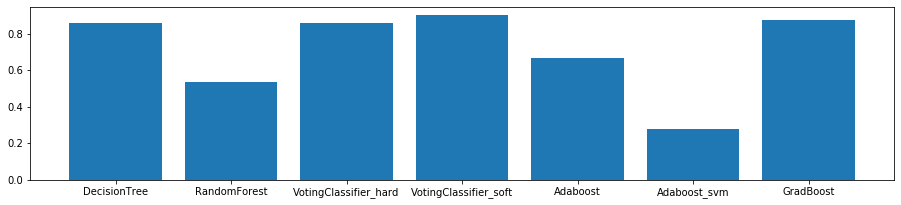

In [66]:
#precision
keys = precision.keys()
values = precision.values()
fig=plt.figure(figsize=(150,30))
axes= fig.add_axes([0.01,0.01,0.08,0.08])
axes.bar(keys, values)